# E-Commerce_Shipping_Data in Kaggle

분류 신경망 빌딩 연습겸 배송이 예상된 시간 내에 도착을 했는지 안했는지 알아보는 

https://www.kaggle.com/datasets/prachi13/customer-analytics

해당 데이터로 딥러닝을 통한 예측을 연습해보기로 했다.

In [ ]:
# code for model save and load 

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print("numpy version:", np.__version__)
print("pandas version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

numpy version: 1.22.4
pandas version: 1.22.4
tensorflow version: 2.9.1
keras version: 2.9.0


In [2]:
# data load

raw_data = pd.read_csv('/Users/Angela/Desktop/Personal/toy1_물류/Train_E-Commerce_Shipping_Data.csv')
raw_data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
raw_data.shape

(10999, 12)

In [4]:
raw_data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Reached.on.Time_Y.N

##  crop columns
cost prediction에 필요할 것으로 생각되는 컬럼만 남긴다. 

In [6]:
# dataframe crop

df = raw_data[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
              'Cost_of_the_Product', 'Prior_purchases',
              'Product_importance' , 'Discount_offered', 'Weight_in_gms',
              'Reached.on.Time_Y.N']]

In [7]:
df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

## categorial columns processing (one-hot encoding)

Warehouse_block, Mode_of_Shipment, Product_importance

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Cost_of_the_Product  10999 non-null  int64 
 4   Prior_purchases      10999 non-null  int64 
 5   Product_importance   10999 non-null  object
 6   Discount_offered     10999 non-null  int64 
 7   Weight_in_gms        10999 non-null  int64 
 8   Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 773.5+ KB


# feature and target


참조: https://velog.io/@hyesoup/문자-카테고리형-데이터-처리-Label-Encoding-One-Hot-Encoding

시도하려고 했으나 훨씬 쉬운 방법을 알아냈다. 


```
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# items1 = df['Warehouse_block'].unique().tolist()
# # items2 = df['Mode_of_Shipment'].unique().tolist()
# # items3 = df['Product_importance'].unique().tolist()

# # 먼저 LabelEncoder로 변환 
# encoder = LabelEncoder()
# encoder.fit(items1)
# labels1 = encoder.transform(items1)

# # 2차원 데이터로 변환 
# labels1 = labels1.reshape(-1,1)

# # 원-핫 인코딩을 적용
# oh_encoder = OneHotEncoder()
# oh_encoder.fit(labels1)
# oh_labels1 = oh_encoder.transform(labels1)
```

In [33]:
df_onehot = pd.get_dummies(data = df, columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], 
                     prefix = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'])
df_onehot

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1
10995,4,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1
10996,5,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0
10997,5,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1


In [34]:
df_onehot.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

## target data one-hot encoding and then set the X and y

카테고리로 되어있는 데이터들을 원핫인코딩을 진행하기로 했다.

In [36]:
X = df_onehot[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium']]
y = df_onehot['Reached.on.Time_Y.N']

In [37]:
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y)
print(y_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## feature dimension 

In [38]:
print(X.shape)

(10999, 16)


## target data classes

타깃 데이터 종류를 확인하는 것으로 분류 문제인지 회귀 문제인지 구분할 수 있다. 연속형 숫자이기 때문에 회귀문제로 해결해야 함을 알 수 있다.

In [39]:
print(set(y))

{0, 1}


## Split Training and Test Data

In [56]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

# Building Perceptron

In [57]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [60]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 16개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 2개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 2개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                340       
                                                                 
 batch_normalization_5 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 42        
                                                                 
 activation_9 (Activation)   (None, 2)                 0         
                                                                 
Total params: 462
Trainable params: 422
Non-trainable params: 40
_______________________________________________________

## model compile

In [62]:
model.compile(loss = 'binary_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])

## model learning

In [63]:
X.isna().sum()

Customer_care_calls          0
Cost_of_the_Product          0
Prior_purchases              0
Discount_offered             0
Weight_in_gms                0
Warehouse_block_A            0
Warehouse_block_B            0
Warehouse_block_C            0
Warehouse_block_D            0
Warehouse_block_F            0
Mode_of_Shipment_Flight      0
Mode_of_Shipment_Road        0
Mode_of_Shipment_Ship        0
Product_importance_high      0
Product_importance_low       0
Product_importance_medium    0
dtype: int64

중간에 트레이닝 데이터와 테스트 데이터 나누는데 원핫인코딩이 아니라 그냥 y를 넣는 바람에

```ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).```
이런 오류가 떠서 잠시 헤맸다.

In [65]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 10)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
825/825 [==============================] - 2s 3ms/step - loss: 0.5647 - accuracy: 0.6454
Epoch 2/30
825/825 [==============================] - 3s 4ms/step - loss: 0.5613 - accuracy: 0.6425
Epoch 3/30
825/825 [==============================] - 3s 4ms/step - loss: 0.5602 - accuracy: 0.6446
Epoch 4/30
825/825 [==============================] - 3s 4ms/step - loss: 0.5556 - accuracy: 0.6478
Epoch 5/30
825/825 [==============================] - 3s 3ms/step - loss: 0.5543 - accuracy: 0.6500
Epoch 6/30
825/825 [==============================] - 2s 3ms/step - loss: 0.5556 - accuracy: 0.6522
Epoch 7/30
825/825 [==============================] - 2s 3ms/step - loss: 0.5527 - accuracy: 0.6537
Epoch 8/30
825/825 [==============================] - 3s 3ms/step - loss: 0.5523 - accuracy: 0.6487
Epoch 9/30
825/825 [==============================] - 2s 3ms/step - loss: 0.5569 - accuracy: 0.6461
Epoch 10/30
825/825 [==============================] - 2s 3ms/step - loss: 0.5506 - accuracy: 0.6509

정확도가 일정 수준에서 더이상 상승하지 않아서 중단하고, 배치사이즈를 10으로 해본다.

# evaluation

정확도를 책정해본다.

In [66]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

258/258 [==============================] - 1s 2ms/step - loss: 0.5690 - accuracy: 0.6777
0.6776579022407532
86/86 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.6742
0.6741818189620972


좋은 결과는 아닌 것으로 보인다.

## Accuracy and loss rate

epoch 별로 그래프를 그리기 쉬워지도록 범위설정하는 arange 함수를 사용한다.

In [67]:
import numpy as np
epoch = np.arange(1, epo +1)               # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [68]:
accuracy = hist.history['accuracy']        # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(accuracy)

[0.6454115509986877, 0.6425021290779114, 0.6445629596710205, 0.6478360891342163, 0.6500181555747986, 0.6522002816200256, 0.6536549925804138, 0.6486846804618835, 0.6461389064788818, 0.6508667469024658, 0.6502606272697449, 0.6568068861961365, 0.6514729261398315, 0.6520790457725525, 0.6466238498687744, 0.6517153382301331, 0.6496545076370239, 0.6577767133712769, 0.6481997966766357, 0.650987982749939, 0.6511092185974121, 0.653170108795166, 0.6548672318458557, 0.6529276371002197, 0.6534125208854675, 0.6569281220436096, 0.6575342416763306, 0.6530488729476929, 0.6541398763656616, 0.6559582948684692]


In [69]:
loss = hist.history['loss']                # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[0.564698338508606, 0.5612615346908569, 0.5602054595947266, 0.555557906627655, 0.5542870759963989, 0.5555774569511414, 0.5526782870292664, 0.5522850751876831, 0.5569313168525696, 0.5506097674369812, 0.5520685315132141, 0.5482234358787537, 0.5491713881492615, 0.5519165396690369, 0.5568854808807373, 0.5527695417404175, 0.5537850856781006, 0.551030158996582, 0.5521168112754822, 0.5515295267105103, 0.5525773167610168, 0.5510694980621338, 0.5528531670570374, 0.5512006878852844, 0.5516085028648376, 0.5497162342071533, 0.5493059158325195, 0.5527685284614563, 0.5514956712722778, 0.5490450263023376]


## Accuracy and loss rate visualization

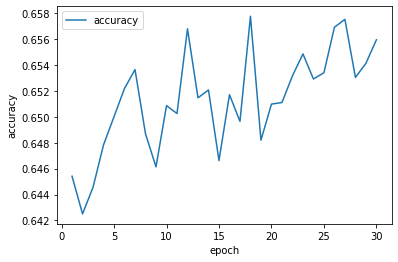

In [70]:
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

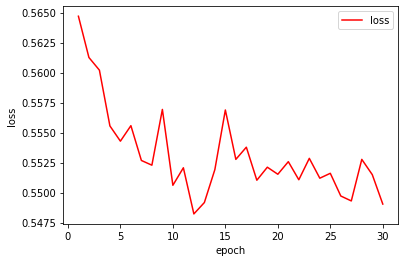

In [71]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Whole code

활성화 함수를 reLu 에서 선형함수로 바꾸었다. 항등함수(identity function)가 linear function으로 불리우기도 한다.

물론 최종 출력층에서 회귀문제는 자동으로 선형이 지정된다고는 하지만 어떤 결과가 나올지 궁금하기도 하니까 말이다.

boston 집값 데이터가 사라질 것을 대비하여 데려오는 방식을 달리해두었다. 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print("numpy version:", np.__version__)
print("pandas version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

# data load
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_boston.values[::2, :], raw_boston.values[1::2, :2]])
# target = raw_boston.values[1::2, 2]
X = np.hstack([raw_boston.values[::2, :], raw_boston.values[1::2, :2]])
y = raw_boston.values[1::2, 2]

# checking the feature dimension and target data
print("-- X and target shape checking --")
print(X.shape)
print(set(y))

# split Training and Test Data
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# building model
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat, activation = 'linear')) # add로 입력층 추가, *input_dim = 피처 개수, 20은 output 차원, 활성화 함수를 한 줄에 넣음.
model.add(Dense(1))                 # 최종 아웃풋 층. 회귀문제로 1개의 노드로 출력되도록 한다. 
                                    # 회귀때 최종 활성화 함수를 선형 함수를 사용해야 하는데, 코드에서 지정하지 않으면 선형 함수가 적용된다.

# model checking
print("-- model summary --")
model.summary()

# compile
model.compile(loss = 'mean_squared_error',         # 손실함수: 회귀 문제이기 때문에 MSE를 사용
              optimizer = 'adam',                  # 옵티마이저와 평가 기준
              metrics = ['mean_squared_error'])

# learning
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

# evaluation by MSE value
print("-- model evaluate with train data by MSE value --")
print(model.evaluate(X_tn, y_tn)[1])
print("-- model evaluate with test data by MSE value --")
print(model.evaluate(X_te, y_te)[1])

# MSE and loss for dataframe
epoch = np.arange(1, epo +1)                   # x축 설정
# print(epoch)
mse = hist.history['mean_squared_error']       # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
# print(mse)
loss = hist.history['loss']                    # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
# print(loss)

# MSE and loss rate visualization
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.title("Mean Squared Error By Epoch")
plt.show()

plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title("Loss By Epoch")
plt.show()

# Predicted Data and Real Data check
# predict 메소드로 테스트 데이터를 넣고 예측값을 구한다. flatten 메소드로 예측값을 펼친다.(DataFrame 만들것)
pred_y = model.predict(X_te).flatten()
print(pred_y)
# pred_y와 real_val을 한 데이터 프레임에 넣기
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te
# res_df.head(3)
# sorting values for visualization
df_sort = res_df.sort_values(['predict_val'], ascending = True)
# df_sort.head(3)

# Predicted Data and Real Data visualization
idx = np.arange(1, len(df_sort)+1)             # x축 생성
plt.scatter(idx, df_sort['real_val'], marker = '.', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

```
previous MSE and loss
 
 12/12 [==============================] - 0s 2ms/step - loss: 51.5557 - mean_squared_error: 51.5557
51.55571365356445
4/4 [==============================] - 0s 2ms/step - loss: 73.9725 - mean_squared_error: 73.9725
73.97251892089844

 this(linear) MSE and loss
 
12/12 [==============================] - 0s 3ms/step - loss: 44.8637 - mean_squared_error: 44.8637
44.8636589050293
4/4 [==============================] - 0s 2ms/step - loss: 60.2318 - mean_squared_error: 60.2318
60.231815338134766

```

MSE도 줄어들고 loss도 많이 줄어들었다. 물론 그래프로 시각화한 결과는 그닥 마음에 드는 결과는 아니다. 그래프로만 보아도 분석하기에 어려운 outlier가 존재하는 것으로 예상된다.

아래는, 중간에 활성화 함수 파라미터 적는 것좀 찾아보기 위해 검색하다 닿은 블로그 참조하였다.: https://muzukphysics.tistory.com/165

 아무튼, ReLU를 선호하는 이유가 있을 것이라고 생각된다. 시그모이드는 그래디언트 소실문제, 그를 보완할 수 있는 하이퍼볼릭 탄젠트도 그래디언트 소실문제를 막을 수는 없다는 것, 렐루는 그래디언트 소실 문제가 발생하지 않고 학습속도가 빠르지만(하이퍼볼릭 탄젠트 대비 약 6배) 음수를 데이터로 받을 경우 항상 0이기 때문에 학습능력이 떨어진다는 점, 그 음수에 관련한 문제를 보완한 것이 리키렐루. 소프트맥스는 출력값들의 합이 항상 1이 되도록 한다는 점에서 출력 노드의 활성화 함수로 많이 사용된다.
 
 
 